# Capgemini Employee Satisfaction iand Happiness- preprocessing

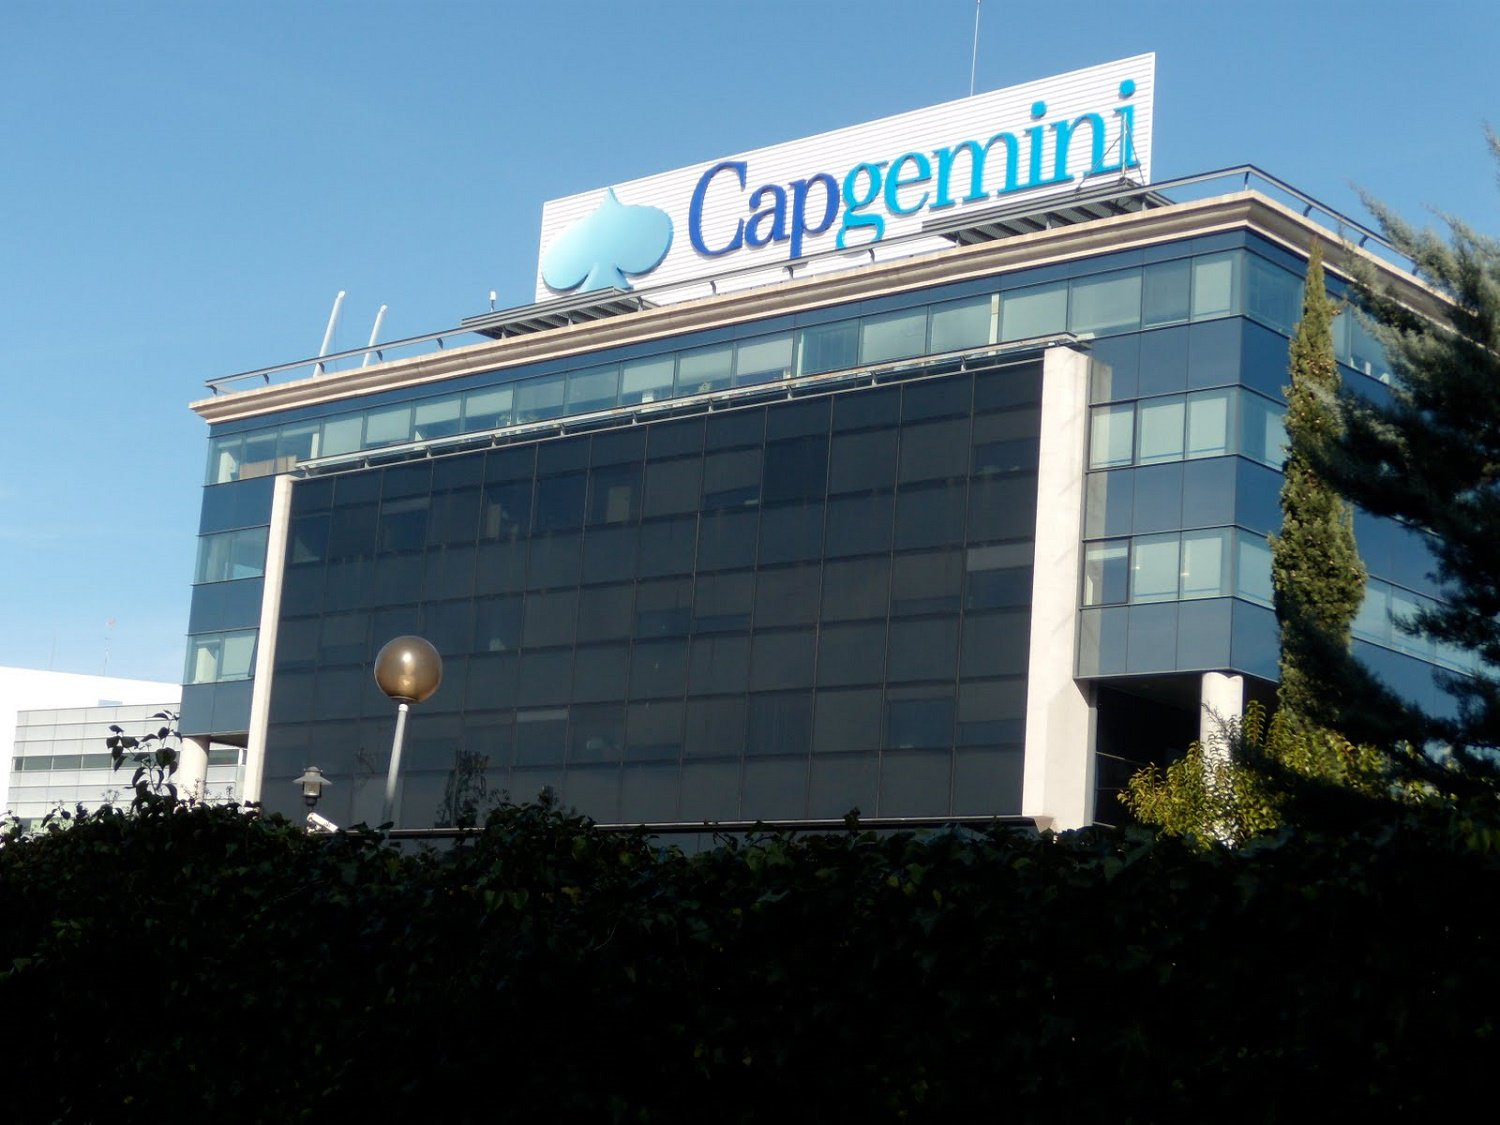

# Project Description:

This capstone project is dedicated to leveraging machine learning techniques to explore employee satisfaction at Capgemini. The primary goal is to gain valuable insights into the various factors influencing employee satisfaction within this organization. Through this analysis, the aim is to predict employee satisfaction ratings using a range of machine learning techniques, including sentiment analysis and classification algorithms.

The potential outcomes of this analysis hold considerable promise for Capgemini and similar organizations. By utilizing the predictive power of machine learning, this project could significantly enhance employee morale and overall satisfaction. Moreover, it could provide the company with the necessary knowledge to make data-driven decisions and implement targeted strategies to optimize the working environment and improve the overall employee experience.

To facilitate this project, I will use a Kaggle dataset containing self-reported employee satisfaction data from Capgemini. This dataset will form the foundation of the analysis. To achieve a comprehensive understanding, I may augment this primary dataset with additional relevant data sources, such as salary structures, demographics, and other factors not included in the core dataset. By integrating this supplementary data, the goal is to gain a more holistic perspective on the intricacies of employee satisfaction, thereby enhancing the accuracy and depth of the predictive models.

By the conclusion of this project, I anticipate having developed a predictive model for employee satisfaction and acquired a wealth of knowledge that can empower Capgemini and similar enterprises to create a more positive and productive work environment for their staff.


References:

 https://www.kaggle.com/datasets/manishkr1754/capgemini-employee-reviews-dataset



# The Model

The data is an extensive survey done at the Capgemini company to evaluate the overall employees' satisfaction in their jobs.

Here is an overview of the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Capgemini_Employee_Reviews_from_AmbitionBox.csv')


In [ ]:
df.head()

Title                           Place   Job_type  \
0         Senior Consultant                            Pune  Full Time   
1  Senior Software Engineer            Kolkata, West Bengal  Full Time   
2         Senior Consultant  Bengaluru/Bangalore, Karnataka  Full Time   
3         Senior Consultant               Pune, Maharashtra  Full Time   
4                 Team Lead            Noida, Uttar Pradesh  Full Time   

                              Department        Date  Overall_rating  \
0           General Insurance Department  8 Sep 2023             4.0   
1        Software Development Department  7 Sep 2023             3.0   
2        Software Development Department  6 Sep 2023             4.0   
3          Banking Operations Department  6 Sep 2023             1.0   
4  IT Infrastructure Services Department  5 Sep 2023             4.0   

   work_life_balance  skill_development  salary_and_benefits  job_security  \
0                4.0                3.0                  3.0           4.0   
1                4.0                4.0                  3.0           4.0   
2                4.0                5.0                  3.0           3.0   
3                2.0                4.0                  1.0           4.0   
4                5.0                4.0                  4.0           4.0   

   career_growth  work_satisfaction  \
0            4.0                4.0   
1            4.0                3.0   
2            4.0                3.0   
3            1.0                1.0   
4            4.0                3.0   

                                               Likes  \
0  Deserved candidates are promoted promptly.\nUn...   
1  You got lot of learning platform and monthly l...   
2  Based on which Business Unit you are you will ...   
3  Some client projects are good as they use the ...   
4  I have worked in IBM (4 years) ,TCS (1 year) ,...   

                                            Dislikes  
0  With designation promotions good salary increm...  
1  You will get fully not tech project.\nThere is...  
2  Some top level management people bring bad nam...  
3  Culture, micro management, unprofessional beha...  
4  Medical insurance amount is quite low compare ...

In [ ]:
column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
df_cols

Columns
0                 Title
1                 Place
2              Job_type
3            Department
4                  Date
5        Overall_rating
6     work_life_balance
7     skill_development
8   salary_and_benefits
9          job_security
10        career_growth
11    work_satisfaction
12                Likes
13             Dislikes

# 1. Data Preparation


## Analyzing the Dataset

In [ ]:
import numpy as np

df.head()

Title                           Place   Job_type  \
0         Senior Consultant                            Pune  Full Time   
1  Senior Software Engineer            Kolkata, West Bengal  Full Time   
2         Senior Consultant  Bengaluru/Bangalore, Karnataka  Full Time   
3         Senior Consultant               Pune, Maharashtra  Full Time   
4                 Team Lead            Noida, Uttar Pradesh  Full Time   

                              Department        Date  Overall_rating  \
0           General Insurance Department  8 Sep 2023             4.0   
1        Software Development Department  7 Sep 2023             3.0   
2        Software Development Department  6 Sep 2023             4.0   
3          Banking Operations Department  6 Sep 2023             1.0   
4  IT Infrastructure Services Department  5 Sep 2023             4.0   

   work_life_balance  skill_development  salary_and_benefits  job_security  \
0                4.0                3.0                  3.0           4.0   
1                4.0                4.0                  3.0           4.0   
2                4.0                5.0                  3.0           3.0   
3                2.0                4.0                  1.0           4.0   
4                5.0                4.0                  4.0           4.0   

   career_growth  work_satisfaction  \
0            4.0                4.0   
1            4.0                3.0   
2            4.0                3.0   
3            1.0                1.0   
4            4.0                3.0   

                                               Likes  \
0  Deserved candidates are promoted promptly.\r\n...   
1  You got lot of learning platform and monthly l...   
2  Based on which Business Unit you are you will ...   
3  Some client projects are good as they use the ...   
4  I have worked in IBM (4 years) ,TCS (1 year) ,...   

                                            Dislikes  
0  With designation promotions good salary increm...  
1  You will get fully not tech project.\r\nThere ...  
2  Some top level management people bring bad nam...  
3  Culture, micro management, unprofessional beha...  
4  Medical insurance amount is quite low compare ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                25912 non-null  object 
 1   Place                24597 non-null  object 
 2   Job_type             11556 non-null  object 
 3   Department           22083 non-null  object 
 4   Date                 25915 non-null  object 
 5   Overall_rating       25898 non-null  float64
 6   work_life_balance    26977 non-null  float64
 7   skill_development    26976 non-null  float64
 8   salary_and_benefits  26947 non-null  float64
 9   job_security         26943 non-null  float64
 10  career_growth        26931 non-null  float64
 11  work_satisfaction    26909 non-null  float64
 12  Likes                23864 non-null  object 
 13  Dislikes             22966 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.9+ MB


The following features have missing data:


<Axes: >

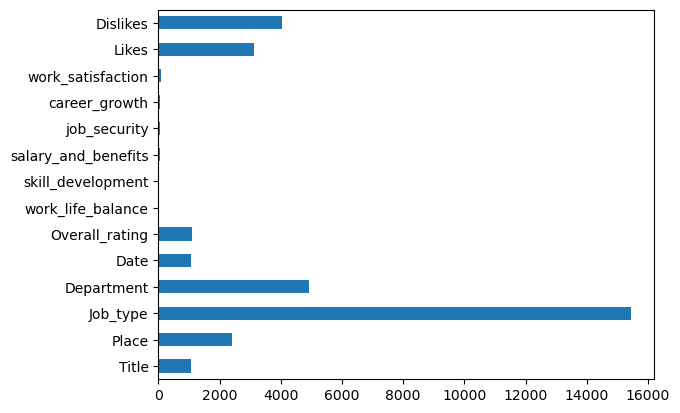

In [ ]:
print (f"The following features have missing data:")
summation_missing = df.isnull().sum()
summation_missing.plot(kind='barh')

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

Total Missing  Percent Missing
Job_type                     15437        57.188901
Department                    4910        18.189901
Dislikes                      4027        14.918683
Likes                         3129        11.591894
Place                         2396         8.876375
Overall_rating                1095         4.056607
Title                         1081         4.004742
Date                          1078         3.993628
work_satisfaction               84         0.311192
career_growth                   62         0.229689
job_security                    50         0.185233
salary_and_benefits             46         0.170415
skill_development               17         0.062979
work_life_balance               16         0.059275

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_of_data_missing = round((total_missing / total_cells) * 100, 2)
print(f"{percent_of_data_missing}% of the data is missing.")

8.85% of the data is missing.


### Ratings by Frequency

C:\Users\DELL\AppData\Local\Temp\ipykernel_10912\2537028073.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


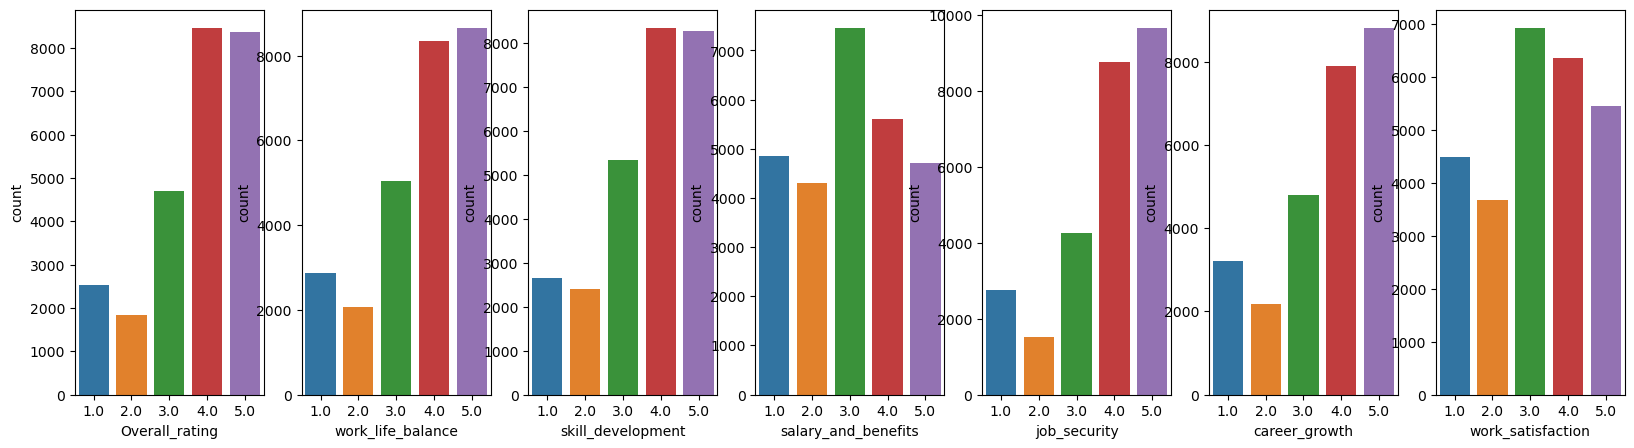

In [ ]:
import seaborn as sns

categorical_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

fig, ax = plt.subplots(1, 7)
fig.set_size_inches(20, 5)
for index, column in enumerate(categorical_columns):
    sns.countplot(df, x=column, ax=ax[index])
fig.show()

### Aggregate Ratings

It has a nice bell curve with 2 outliers for the highest and near lowest rankings.

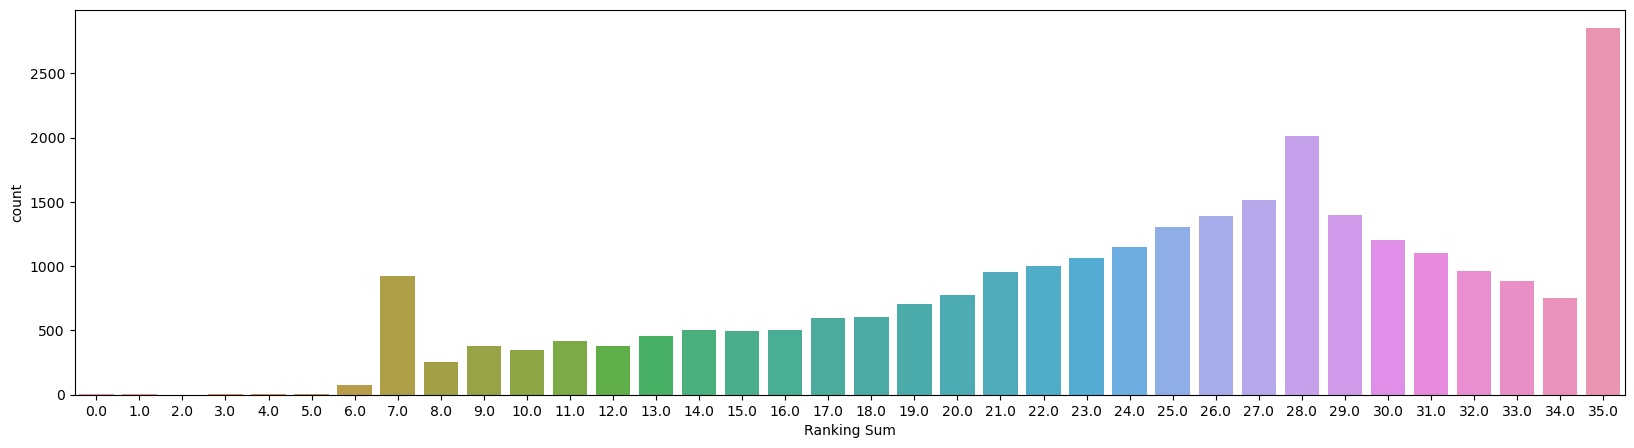

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

categorical_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

category_total = df[categorical_columns].sum(axis=1)
df_category_total = pd.DataFrame({"Ranking Sum": category_total})
sns.countplot(df_category_total, x="Ranking Sum")
# increase size of figure
fig = plt.gcf()
fig.set_size_inches(20, 5)
fig.show()

### Job Types

Virtually everyone is full time.  

count         11556
unique            5
top       Full Time
freq          11340
Name: Job_type, dtype: object


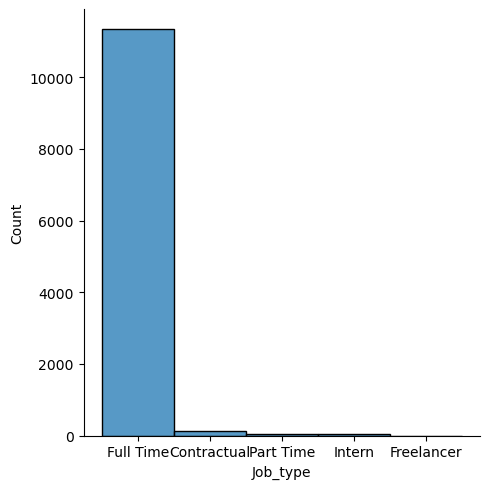

In [ ]:
print(df["Job_type"].describe())
sns.displot(df["Job_type"])

### Departments

<Axes: ylabel='Department'>

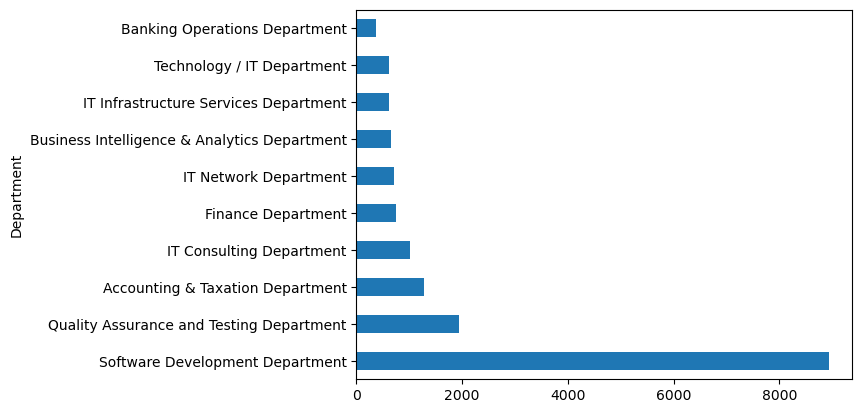

In [ ]:
# graph the top 10 most common job titles
df["Department"].value_counts().head(10).plot(kind="barh")

### Places

<Axes: ylabel='Place'>

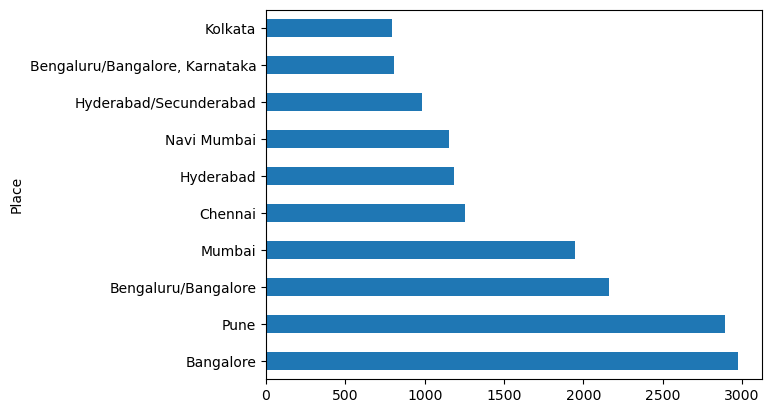

In [ ]:
# graph the top 10 most common job titles
df["Place"].value_counts().head(10).plot(kind="barh")

### Titles

<Axes: ylabel='Title'>

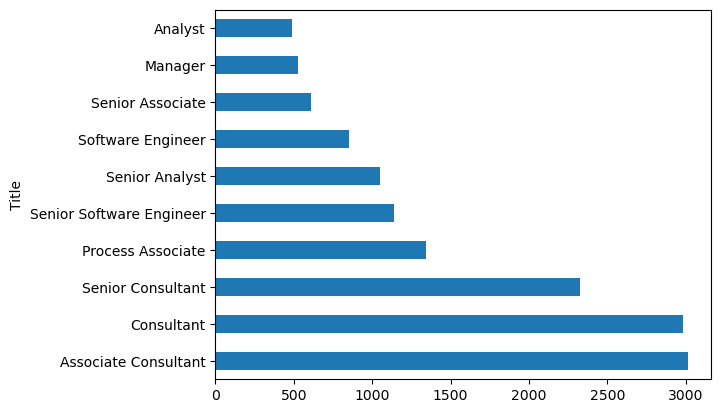

In [ ]:
# graph the top 10 most common job titles
df["Title"].value_counts().head(10).plot(kind="barh")

### Correlation of Ratings

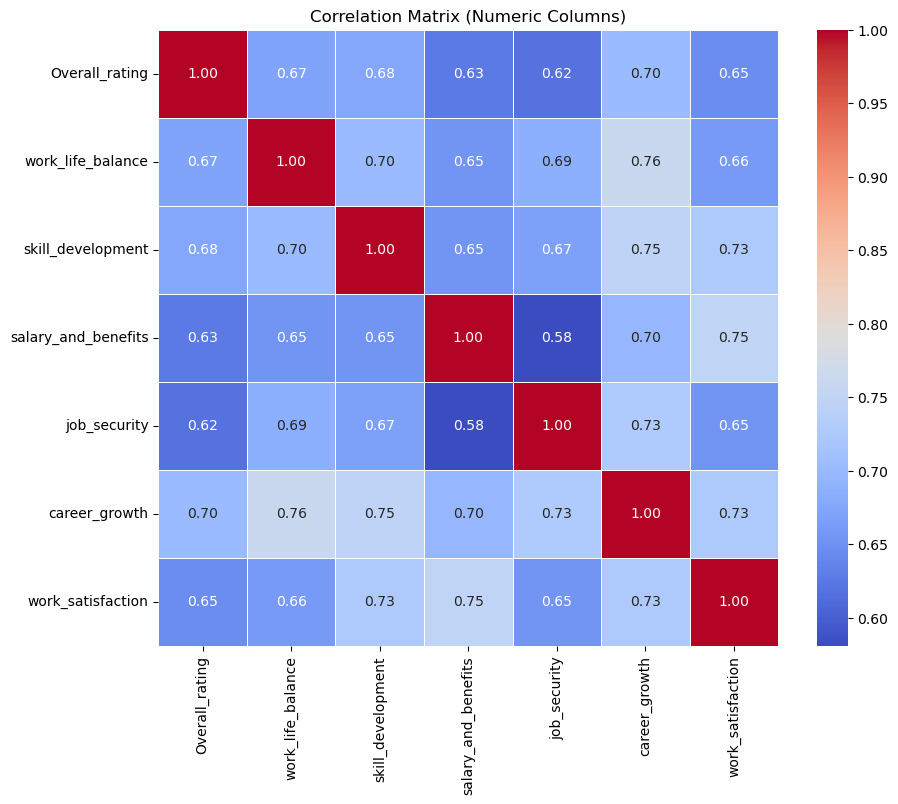

In [ ]:
numeric_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]
numeric_corr = df[numeric_columns].corr()
# correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

In [ ]:
ix = numeric_corr.sort_values("Overall_rating", ascending=False).index
ix = ix.drop("Overall_rating")
print(
    f"The self rankings with the highest to lowest correlation with Overall_rating are:"
)
ix.values

The self rankings with the highest to lowest correlation with Overall_rating are:


array(['career_growth', 'skill_development', 'work_life_balance',
       'work_satisfaction', 'salary_and_benefits', 'job_security'],
      dtype=object)

In [ ]:
print(
    f"The self rankings with the highest correlation are {ix[0]} and {ix[1]} with a correlation of {numeric_corr.loc[ix[0], ix[1]]}"
)

The self rankings with the highest correlation are career_growth and skill_development with a correlation of 0.7469945623877832


In [ ]:
print(
    f"The self rankings with the lowest correlation are {ix[4]} and {ix[5]} with a correlation of {numeric_corr.loc[ix[4], ix[5]]}"
)

The self rankings with the lowest correlation are salary_and_benefits and job_security with a correlation of 0.5808948987666473


## Cleaning the data

### Remove rows where overall_rating is null
Drop rows with missing values in the column Overall_rating. Overall rating is the target column and required for classification.

In [ ]:
# nabil sleiman
# create a hwldwut df where overall_rating was null in original df
holdout_df = df[df['Overall_rating'].isnull()]

In [ ]:
# nabil sleiman
holdout_df.tail()

Title      Place Job_type                  Department  \
26988    Senior Director        NaN      NaN      IT Security Department   
26989  Senior Consultant        NaN      NaN  Technology / IT Department   
26990    System Engineer        NaN      NaN       IT Network Department   
26991      Hr Generalist    Kolkata      NaN    HR Operations Department   
26992     Resume  Writer  Hyderabad      NaN                         NaN   

             Date  Overall_rating  work_life_balance  skill_development  \
26988  5 Sep 2017             NaN                1.0                1.0   
26989  3 Sep 2017             NaN                5.0                1.0   
26990  7 Sep 2017             NaN                3.0                3.0   
26991  6 Sep 2017             NaN                4.0                3.0   
26992  4 Mar 2018             NaN                NaN                NaN   

       salary_and_benefits  job_security  career_growth  work_satisfaction  \
26988                  1.0           1.0            1.0                1.0   
26989                  1.0           4.0            2.0                1.0   
26990                  2.0           3.0            1.0                1.0   
26991                  3.0           4.0            4.0                2.0   
26992                  NaN           NaN            NaN                NaN   

                                                   Likes  \
26988  no stretched pressures on margins, which makes...   
26989  capgemini quality resource hiring is missing.H...   
26990          Very good employee engagement activities.   
26991  The company is open to innovation and readily ...   
26992                                                NaN   

                                Dislikes  
26988                  very bureaucratic  
26989                               good  
26990  Career growth opportunity is less  
26991                                 No  
26992                                NaN

In [ ]:
holdout_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 13090 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                17 non-null     object 
 1   Place                10 non-null     object 
 2   Job_type             1 non-null      object 
 3   Department           15 non-null     object 
 4   Date                 17 non-null     object 
 5   Overall_rating       0 non-null      float64
 6   work_life_balance    1091 non-null   float64
 7   skill_development    1090 non-null   float64
 8   salary_and_benefits  1070 non-null   float64
 9   job_security         1067 non-null   float64
 10  career_growth        1063 non-null   float64
 11  work_satisfaction    1043 non-null   float64
 12  Likes                12 non-null     object 
 13  Dislikes             11 non-null     object 
dtypes: float64(7), object(7)
memory usage: 128.3+ KB


In [ ]:
# Title is almost always missing when overall rating is missing
before_drop = len(df.index)
df = df.dropna(subset=["Title", "Overall_rating"])
after_drop = len(df.index)
dropped = before_drop - after_drop
print(
    f"There were {before_drop} rows before dropping 'Overall_rating' and {after_drop} rows after dropping 'Overall_rating\n'",
    f"{dropped} were removed from analysis"
)

There were 26993 rows before dropping 'Overall_rating' and 25895 rows after dropping 'Overall_rating
' 1098 were removed from analysis


### Impute Missing Data

In [ ]:
# fill in empty values with NA
# fix Place data
no_place = {
    "..": "na",
    "any location": "na",
    "any": "na",
    "any place": "na",
    "client location ": "na",
    "client office": "na",
    "confidential": "na",
    "customer location": "na",
    "do not with to disclose": "na",
    "doesn" "t matter": "na",
    "everywhere": "na",
    "i don" "t know i did only internship only": "na",
    "no idea": "na",
    "office": "na",
    "somewhere": "na",
    "xyz": "na",
    "it's very good experience.": "na",
    "i don't know i did only internship only": "na",
}

outside_india = {
    "uk": "united kingdom",
    "usa": "united states",
    "sydneu": "sydney",
}

bangalore = {
    "6b bangalore": "bangalore",
    "6b ecospace": "bangalore",
    "6b": "bangalore",
    "bagalore": "bangalore",
    "baglore": "bangalore",
    "bamgalore": "bangalore",
    "banagalore": "bangalore",
    "banaglore": "bangalore",
    "bangaloe": "bangalore",
    "bangalor": "bangalore",
    "bangalore 6b": "bangalore",
    "bangalore dtp": "bangalore",
    "bangalore epip": "bangalore",
    "bangalore rural": "bangalore",
    "bangalore urban": "bangalore",
    "bangalore whitefield": "bangalore",
    "bangalore.": "bangalore",
    "bangalore/bengaluru": "bangalore",
    "bangalores": "bangalore",
    "bangalorr": "bangalore",
    "bangaluru": "bangalore",
    "banglore bmp": "bangalore",
    "banglore datacom": "bangalore",
    "banglore whitefield": "bangalore",
    "banglore": "bangalore",
    "bbangalore": "bangalore",
    "bengalore": "bangalore",
    "bengaluru": "bangalore",
    "bengaluru/bangalore": "bangalore",
    "benglore": "bangalore",
    "benguluru": "bangalore",
    "blore": "bangalore",
    "blr": "bangalore",
    "capgemini bangalore": "bangalore",
    "dtp bangalore": "bangalore",
    "dtp": "bangalore",
    "whietfield": "bangalore",
    "whiltefield": "bangalore",
    "whiltefield": "bangalore",
    "white feeld": "bangalore",
    "white field dtp": "bangalore",
    "white field summit towers a": "bangalore",
    "white field": "bangalore",
    "White Filed": "bangalore",
    "white filed": "bangalore",
    "whitefield bangalore": "bangalore",
    "whitefield": "bangalore",
    "whitefiled": "bangalore",
    "whitfield": "bangalore",
}

rest_of_india = {
    "hyderabad/secunderabad": "hyderabad",
    "hyderbad": "hyderabad",
    "hydrabad": "hyderabad",
    "hyder": "hyderabad",
    "hyd": "hyderabad",
    "navi mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "airoli mumbai": "mumbai",
    "mumbai airoli": "mumbai",
    "airoli navi mumbai": "mumbai",
    "airloi": "mumbai",
    "airoli sez": "mumbai",
    "airloi": "mumbai",
    "airoli,mumbai": "mumbai",
    "airoli,navi mumbai": "mumbai",
    "airolo": "mumbai",
    "airoli sez": "mumbai",
    "airoli west": "mumbai",
    "airoli,maharashtra": "mumbai",
    "airolo": "mumbai",
    "airoil mumbai": "mumbai",
    "airoli yosemite": "mumbai",
    "airoli mindspace": "mumbai",
    "airolii": "mumbai",
    "aeroli": "mumbai",
    "airoli mindspace": "mumbai",
    "new mumbai": "mumbai",
    "vikhroli": "vikhroli",
    "vikhroli - mumbai": "vikhroli",
    "vikhroli east": "vikhroli",
    "vikhroli,mumbai and airoli": "vikhroli",
    "vikroli": "vikhroli",
    "vikroholi": "vikhroli",
    "vikhroli office": "vikhroli",
    "vikhroli mumbai": "vikhroli",
    "vikhroli,mumbai": "vikhroli",
    "vikhrolli": "vikhroli",
    "vikhrolli": "vikhroli",
    "gurgaon/gurugram": "gurgaon",
    "gurugram": "gurgaon",
    "greater noida": "noida",
    "noida nsez": "noida",
    "nsez noida": "noida",
    "nsez": "noida",
    "noida sez": "noida",
    "new delhi": "delhi",
    "delhi ncr": "delhi",
    "talwade pune": "pune",
    "pune talwade": "pune",
    "punr": "pune",
    "hinjewadi pune": "pune",
    "pune hinjewadi": "pune",
    "chenani": "chennai",
    "trichy": "tiruchirappalli",
    "tiruchirapalli": "tiruchirappalli",
    "tiruchuli": "tiruchirappalli",
    "selam": "salem",
    "yasomite airoli": "yosemite airoli",
    "wfh (working remotely)": "remote",
    "work from home (working remotely)": "remote",
    "remote (working remotely)": "remote",
    "remotely": "remote",
    "although i am still working from home so it depends project to project": "remote",
    "home": "remote",
    "no i work from home only during vivid 29": "remote",
    "trich": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichy,vrn": "tiruchirapalli",
    "trichirapalli": "tiruchirapalli",
    "trichirappalli": "tiruchirapalli",
    "talawade": "pune",
    "talwade": "pune",
    "pu ne": "pune",
    "pu e": "pune",
    "pu": "pune",
    "talvade pune": "pune",
    "talwadde": "pune",
    "talawde": "pune",
    "pune,talawade": "pune",
    "talawade,pune": "pune",
    "pube": "pune",
    "talwade,pune": "pune",
    "talawade pune": "pune",
    "talwade pune. depend it" "s chandes": "pune",
}

all_places = no_place | outside_india | bangalore | rest_of_india


df["Place"] = df["Place"].fillna("na").apply(lambda x: x.lower().split(", ")[0])
df["Place"] = df["Place"].replace(all_places)




### Make Title info consistent

In [ ]:
# make casing consistent
# replace Sr./Sr with Senior and fix missing spaces
df["Title"] = df["Title"].str.lower()
df["Title"] = df["Title"].str.replace("sr. ", "senior ")
df["Title"] = df["Title"].str.replace("sr ", "senior ")
df["Title"] = df["Title"].str.replace("sr. ", "senior ")
df["Title"] = df["Title"].str.replace("sr", "senior")
df["Title"] = df["Title"].str.replace("operation ", "operations ")
df["Title"] = df["Title"].str.replace("human resource", "hr")
df["Title"] = df["Title"].str.replace("human resources", "hr")

df.to_csv('hello.csv')

### Tokenize Titles

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# without min_df the vectorizer will include words that only appear once
# found min_df=0.0001 to be a good value
count_vect = CountVectorizer(stop_words="english", min_df=0.0001)
X_train_counts = count_vect.fit_transform(df["Title"])
count_array = X_train_counts.toarray()
token_df = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out())

# if there are overlapping column names, drop them
token_df = token_df.drop(df.columns, axis=1, errors="ignore")

df = df.join(token_df)

df.head()

Title      Place   Job_type  \
0         senior consultant       pune  Full Time   
1  senior software engineer    kolkata  Full Time   
2         senior consultant  bangalore  Full Time   
3         senior consultant       pune  Full Time   
4                 team lead      noida  Full Time   

                              Department        Date  Overall_rating  \
0           General Insurance Department  8 Sep 2023             4.0   
1        Software Development Department  7 Sep 2023             3.0   
2        Software Development Department  6 Sep 2023             4.0   
3          Banking Operations Department  6 Sep 2023             1.0   
4  IT Infrastructure Services Department  5 Sep 2023             4.0   

   work_life_balance  skill_development  salary_and_benefits  job_security  \
0                4.0                3.0                  3.0           4.0   
1                4.0                4.0                  3.0           4.0   
2                4.0                5.0                  3.0           3.0   
3                2.0                4.0                  1.0           4.0   
4                5.0                4.0                  4.0           4.0   

   ...  wfm  windows wintel wlan   wm  work  workday  working  writer  years  
0  ...  0.0      0.0    0.0  0.0  0.0   0.0      0.0      0.0     0.0    0.0  
1  ...  0.0      0.0    0.0  0.0  0.0   0.0      0.0      0.0     0.0    0.0  
2  ...  0.0      0.0    0.0  0.0  0.0   0.0      0.0      0.0     0.0    0.0  
3  ...  0.0      0.0    0.0  0.0  0.0   0.0      0.0      0.0     0.0    0.0  
4  ...  0.0      0.0    0.0  0.0  0.0   0.0      0.0      0.0     0.0    0.0  

[5 rows x 554 columns]

In [ ]:
title_vectorized = list(token_df.columns) + ["Overall_rating"]
title_corr = df[title_vectorized].corr()


title_sorted = title_corr.sort_values("Overall_rating", ascending=False)
ix = title_sorted.index.drop("Overall_rating")
print(
    f"The self rankings with the highest to lowest correlation with Overall_rating are:"
)
ix
title_sorted.head(3)

The self rankings with the highest to lowest correlation with Overall_rating are:


02       365        5g        a3        a4        a5  \
Overall_rating  0.000413  0.002541 -0.012018  0.003096 -0.009047  0.007695   
remotely       -0.001869 -0.001618 -0.001618 -0.002863 -0.005206 -0.002472   
working        -0.001881 -0.001629 -0.001629 -0.002949 -0.005240 -0.002489   

                    abap  abinitio   access   account  ...   windows  \
Overall_rating -0.001368  0.002935  0.00943 -0.001112  ... -0.001112   
remotely       -0.008981 -0.001869 -0.00310 -0.004858  ...  0.003573   
working        -0.009041 -0.001881 -0.00312 -0.004890  ...  0.003487   

                  wintel      wlan        wm      work   workday   working  \
Overall_rating -0.001200 -0.006194 -0.010421 -0.004631  0.002541  0.018891   
remotely       -0.002643 -0.001618 -0.003966 -0.001869 -0.001618  0.993355   
working        -0.002661 -0.001629 -0.003992  0.019873 -0.001629  1.000000   

                  writer     years  Overall_rating  
Overall_rating -0.003669 -0.001588        1.000000  
remotely       -0.006480 -0.002698        0.019887  
working        -0.006523 -0.002716        0.018891  

[3 rows x 541 columns]

The highest correlations between an overall rating and titles is "remotely' and 'working'.  Employees enjoy (or possible don't) enjoy working from home!


Let's create a column to indicate if someone works remotely or not and use that instead of job title.

In [ ]:
# where Place is NA and titla contains the phrase "Remotely" I can assume they work remotely for their Place.
def isRemoteTitle(title, place):
    if "Remote" == place or "Remote".casefold() in title.casefold():
        return 1
    else:
        return 0


df["Is Remote"] = df.apply(lambda x: isRemoteTitle(x.Title, x.Place), axis=1)

### Parse Dates and fill in missing ones

In [ ]:
def get_date(x):
    try:
        return str(x)[2:]
    except:
        return "None"


df["Date"] = df["Date"].fillna("0 None").apply(get_date)
df["Date"] = pd.to_datetime(df["Date"], format="%b %Y", errors="raise")

### Fill missing 'rating data' with Frequent value

In [ ]:
# Set ratings as categorical data
from pandas import CategoricalDtype
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

rating_columns = [
    "Overall_rating",
    "work_life_balance",
    "skill_development",
    "salary_and_benefits",
    "job_security",
    "career_growth",
    "work_satisfaction",
]

# use SimpleImputer to fill missing values for columnn Overall_rating with the most frequent value
for column in rating_columns:
    imputer = SimpleImputer(strategy="most_frequent")
    df[column] = imputer.fit_transform(df[[column]])
    df[column] = df[column].astype("float64")

### Fill missing 'Job Types' with Frequent value

In [ ]:
# Filling every NA cell for 'Job_type' with 'Full Time'
df["Job_type"].fillna("Full Time", inplace=True)
df["Job_type"] = df["Job_type"].astype("string")

In [ ]:
# Set rest of columns as strings
string_columns = ["Title", "Place", "Department", "Likes", "Dislikes"]

for column in string_columns:
    df[column] = df[column].astype("string")

In [ ]:
print("Data after preperation")
df.info()

df.to_csv("data/Capgemini_Employee_Reviews_from_AmbitionBox_cleaned.csv", index=False)

Data after preperation
<class 'pandas.core.frame.DataFrame'>
Index: 25895 entries, 0 to 26975
Columns: 555 entries, Title to Is Remote
dtypes: datetime64[ns](1), float64(547), int64(1), string(6)
memory usage: 110.9 MB


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import os

In [ ]:
# number of unique records, total records and column data type
for col in df.columns[:14]:
    a = col, len(df[col].unique()), len(df[col])
    b = df[col].dtypes
    print(a, b)

('Title', 4175, 25895) string
('Place', 531, 25895) string
('Job_type', 5, 25895) string
('Department', 620, 25895) string
('Date', 74, 25895) datetime64[ns]
('Overall_rating', 5, 25895) float64
('work_life_balance', 5, 25895) float64
('skill_development', 5, 25895) float64
('salary_and_benefits', 5, 25895) float64
('job_security', 5, 25895) float64
('career_growth', 5, 25895) float64
('work_satisfaction', 5, 25895) float64
('Likes', 17496, 25895) string
('Dislikes', 17550, 25895) string


In [ ]:
df.describe()

Date  Overall_rating  work_life_balance  \
count                       25895    25895.000000       25895.000000   
mean   2021-05-20 19:45:38.613632        3.707241           3.677891   
min           2017-08-01 00:00:00        1.000000           1.000000   
25%           2019-06-01 00:00:00        3.000000           3.000000   
50%           2022-04-01 00:00:00        4.000000           4.000000   
75%           2022-12-01 00:00:00        5.000000           5.000000   
max           2023-09-01 00:00:00        5.000000           5.000000   
std                           NaN        1.257243           1.282375   

       skill_development  salary_and_benefits  job_security  career_growth  \
count       25895.000000          25895.00000  25895.000000   25895.000000   
mean            3.650859              3.04916      3.799189       3.643020   
min             1.000000              1.00000      1.000000       1.000000   
25%             3.000000              2.00000      3.000000       3.000000   
50%             4.000000              3.00000      4.000000       4.000000   
75%             5.000000              4.00000      5.000000       5.000000   
max             5.000000              5.00000      5.000000       5.000000   
std             1.264789              1.33314      1.261508       1.325407   

       work_satisfaction            02           365  ...       windows  \
count       25895.000000  24976.000000  24976.000000  ...  24976.000000   
mean            3.177254      0.000160      0.000120  ...      0.001081   
min             1.000000      0.000000      0.000000  ...      0.000000   
25%             2.000000      0.000000      0.000000  ...      0.000000   
50%             3.000000      0.000000      0.000000  ...      0.000000   
75%             4.000000      0.000000      0.000000  ...      0.000000   
max             5.000000      1.000000      1.000000  ...      1.000000   
std             1.346657      0.012654      0.010959  ...      0.032862   

             wintel          wlan            wm          work       workday  \
count  24976.000000  24976.000000  24976.000000  24976.000000  24976.000000   
mean       0.000320      0.000120      0.000721      0.000160      0.000120   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   
std        0.017895      0.010959      0.026837      0.012654      0.010959   

            working        writer         years     Is Remote  
count  24976.000000  24976.000000  24976.000000  25895.000000  
mean       0.021621      0.001922      0.000400      0.020776  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      2.000000      1.000000  
std        0.145445      0.043798      0.021916      0.142637  

[8 rows x 549 columns]

# Likes, Dislikes -> Vector

In [ ]:
pip install gensim


     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ------------------------------------ --- 61.4/67.1 kB 1.7 MB/s eta 0:00:01
     ---------------------------------------- 67.1/67.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=685e64510e1ba6f814ee6eab49dd895fe069a3b3c3a13657fa07529b8ff31861
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=669f6e1733ee06305f6758a4b10bf20e59c37ae701e02e12c579eb46421acc5f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\9d\ff\2f\afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Succ

In [4]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download("punkt")  # nltk data download

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

punkt: pre Trained dataset for Word2Vec model

Meaning of each Parameter of Word2Vec model:
- sentences: List of tokenized sentences.
- vector_size: Size of the vectors for each word(=dimension), Normally Middle size = 100
- window: Size of the context window considered by the model.
- min_count: Minimum frequency for a word to be included in the model.
- workers: Number of CPU cores used for model training.

When creating a Word2Vec model, parameters set as below.

* sentences=tokenized_likes: It represents a list of tokenized sentences used for model training.
* vector_size=100: It indicates the size of the vectors for each word. A larger vector size can capture more abstract features but comes with increased computational cost, so an appropriate size, such as 100, is commonly used.
* window=5: It denotes the size of the context window, specifying the number of words considered around a given word. For example, with window=5, up to five words before and after each word are taken into account.
* min_count=1: It is the minimum frequency required for a word to be included in the model. This setting avoids including words with very low frequencies in the model.
* workers=4: It represents the number of CPU cores used for model training. Parallel processing can speed up training, and it's generally recommended to set it according to the number of available CPU cores.

The vector_size parameter represents the size or dimension of the vectors assigned to each word. Therefore, vector_size=100 means representing each word as a 100-dimensional vector. A larger vector size creates a larger and more complex representation space for words. While larger vector sizes can provide more sophisticated representations, they come with higher computational costs and a risk of overfitting, especially with limited data. Thus, choosing an appropriate vector size is crucial.
Additionally, word embedding technologies like Word2Vec are trained to capture semantic similarity between words. However, each dimension of the vectors does not have a direct interpretable meaning. Each dimension represents specific word features learned by the model. As a result, interpreting the exact meaning of each dimension can be challenging.

In [ ]:
# Likes Column's Blank -> ' '
df["Likes"] = df["Likes"].fillna("")

# Text -> Tokenize & Save as List
tokenized_likes = df["Likes"].apply(word_tokenize)

# Word2Vec model - Need to choose the 'Vector size'
word2vec_model = Word2Vec(
    sentences=tokenized_likes, vector_size=100, window=5, min_count=1, workers=4
)

# Vector
word_vectors = word2vec_model.wv

# make 'Sentence Vectors'
sentence_vectors = tokenized_likes.apply(
    lambda x: np.mean(
        [word_vectors[token] for token in x if token in word_vectors], axis=0
    )
)

# Add 'Sentece_Vector' to dataframe
max_dimensions = max(
    sentence_vectors.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
)
for i in range(max_dimensions):
    df[f"Likes_vector_{i}"] = sentence_vectors.apply(
        lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan
    )

In [ ]:
# Dislikes Column's Blank -> ' '
df["Dislikes"] = df["Dislikes"].fillna("")

# Text -> Tokenize & Save as List
tokenized_dislikes = df["Dislikes"].apply(word_tokenize)

# Word2Vec model for Dislikes
word2vec_model_dislikes = Word2Vec(
    sentences=tokenized_dislikes, vector_size=100, window=5, min_count=1, workers=4
)

# Vector for Dislikes
word_vectors_dislikes = word2vec_model_dislikes.wv

# Make 'Sentence Vectors' for Dislikes
sentence_vectors_dislikes = tokenized_dislikes.apply(
    lambda x: np.mean(
        [word_vectors_dislikes[token] for token in x if token in word_vectors_dislikes],
        axis=0,
    )
)

# Add 'Sentence_Vector' for Dislikes to DataFrame
max_dimensions_dislikes = max(
    sentence_vectors_dislikes.apply(
        lambda x: len(x) if isinstance(x, np.ndarray) else 0
    )
)
for i in range(max_dimensions_dislikes):
    df[f"Dislikes_vector_{i}"] = sentence_vectors_dislikes.apply(
        lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan
    )

In [ ]:
pd.set_option('display.max_columns', None)  # print all columns
pd.set_option('display.max_rows', None)  # print all rows

column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
# df_cols

In [2]:
!pip install wordcloud

In [5]:
from wordcloud import WordCloud
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### WordCoud analysis

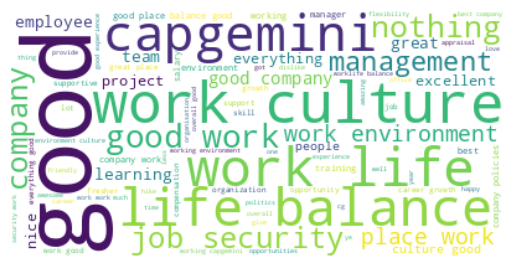

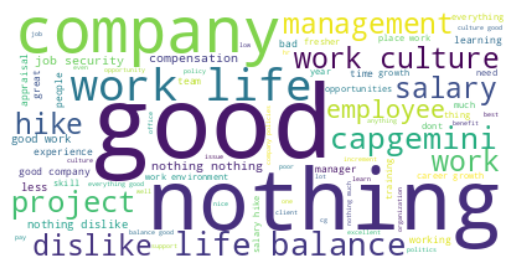

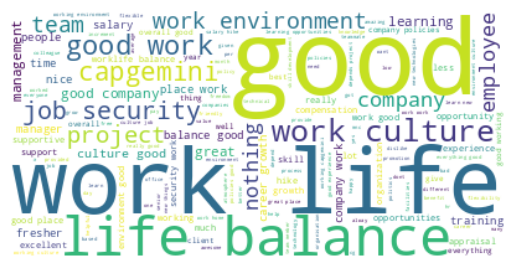

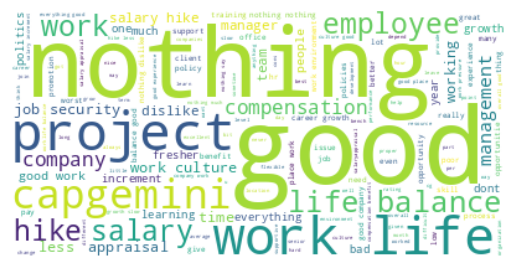

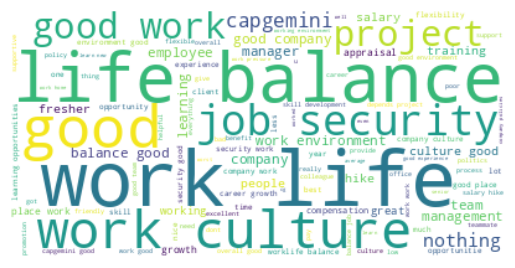

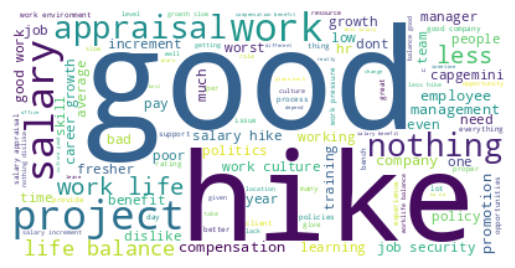

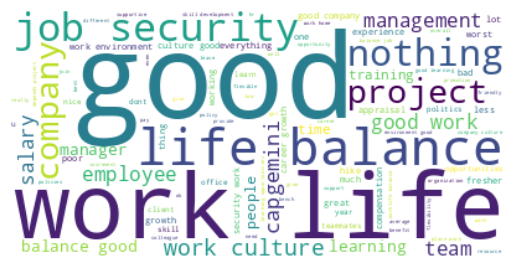

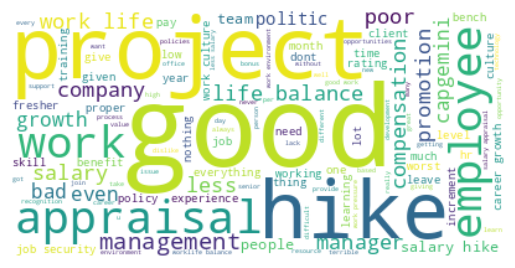

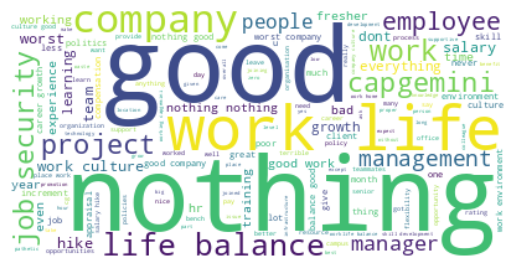

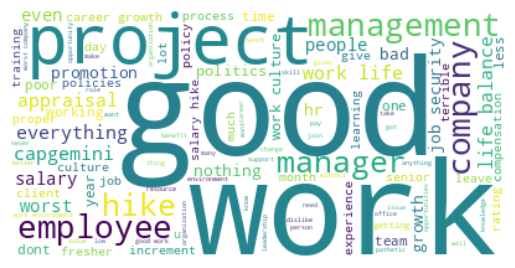

In [6]:
comments = [' '.join(str(x) for x in (df[df["work_satisfaction"]==5]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==5]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==4]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==4]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==3]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==3]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==2]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==2]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==1]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==1]["Dislikes"].dropna()))]
titles = ['work_satisfaction=5 vs Likes',
          'work_satisfaction=5 vs Dislikes',
          'work_satisfaction=4 vs Likes',
          'work_satisfaction=4 vs Dislikes',
          'work_satisfaction=3 vs Likes',
          'work_satisfaction=3 vs Dislikes',
          'work_satisfaction=2 vs Likes',
          'work_satisfaction=2 vs Dislikes',
          'work_satisfaction=1 vs Likes',
          'work_satisfaction=1 vs Dislikes']
# Text preprocessing
def preprocess_text(text):
        # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Create WordCloud objects
wordclouds = [WordCloud(width=400, height=200, background_color='white').generate(preprocess_text(comment)) for comment in comments]

# Display the word clouds using matplotlib
for i, wordcloud in enumerate(wordclouds):
    plt.figure(i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
plt.show()

Through preprocessing, the data has been saved to "data/Capgemini_Employee_Reviews_from_AmbitionBox_cleaned.csv".
And we have use NLTK and WordCloud to get an initial view of the data.